In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# Display the first few rows of the dataset
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Summary statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [4]:
# Check for missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


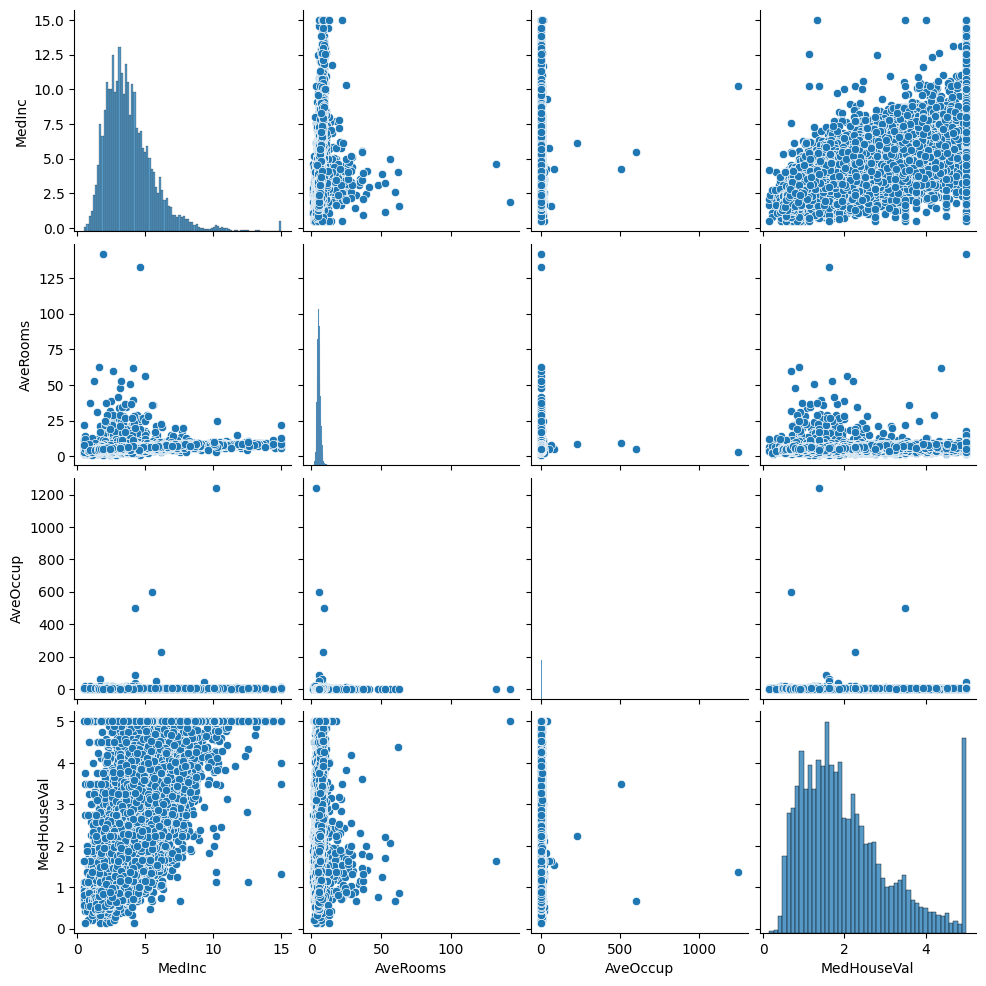

In [5]:
# Pairplot for visualizing relationships
sns.pairplot(df, vars=['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal'])
plt.show()


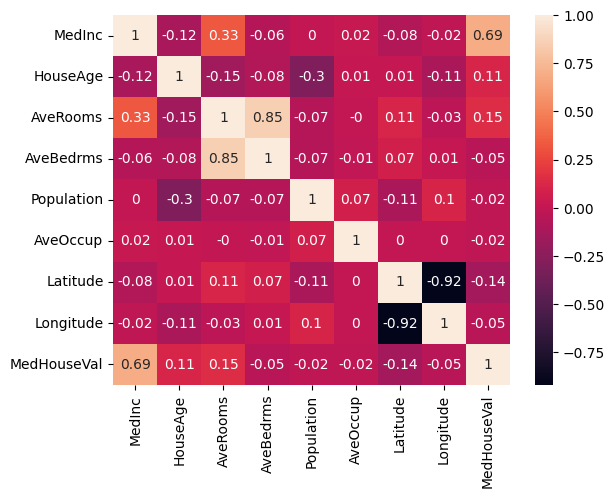

In [6]:
# Correlation matrix
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

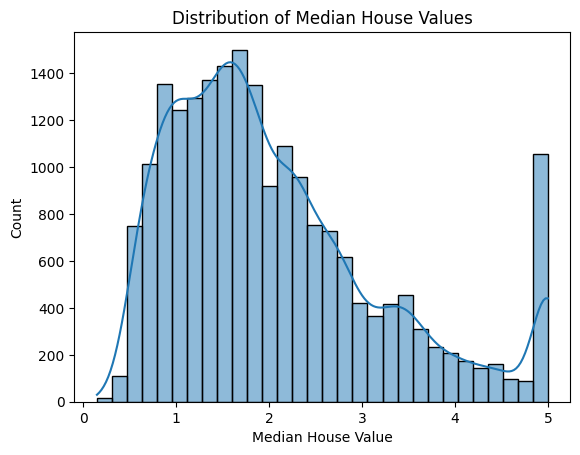

In [7]:
# Distribution of the target variable (MedHouseVal)
sns.histplot(df['MedHouseVal'], bins=30, kde=True)
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Values')
plt.show()

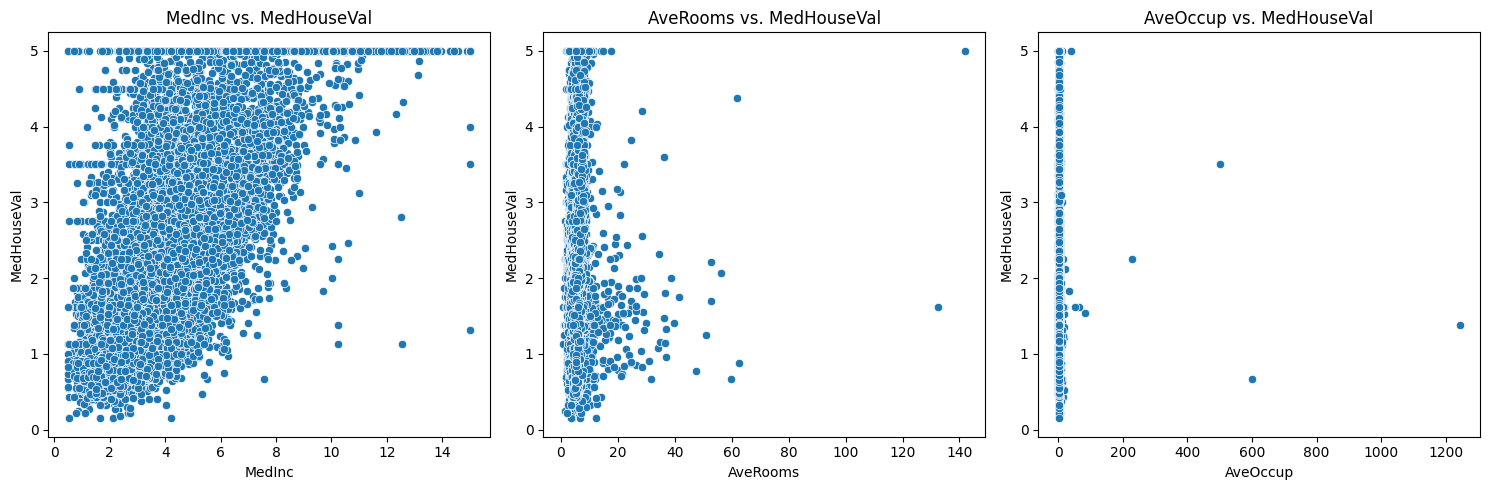

In [8]:
# Scatter plots for features vs. target
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, ax=axs[0])
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df, ax=axs[1])
sns.scatterplot(x='AveOccup', y='MedHouseVal', data=df, ax=axs[2])
axs[0].set_title('MedInc vs. MedHouseVal')
axs[1].set_title('AveRooms vs. MedHouseVal')
axs[2].set_title('AveOccup vs. MedHouseVal')
plt.tight_layout()
plt.show()

In [11]:
# Define features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training R^2: {train_r2:.2f}")
print(f"Testing R^2: {test_r2:.2f}")


Training MSE: 0.04
Testing MSE: 0.26
Training R^2: 0.97
Testing R^2: 0.81


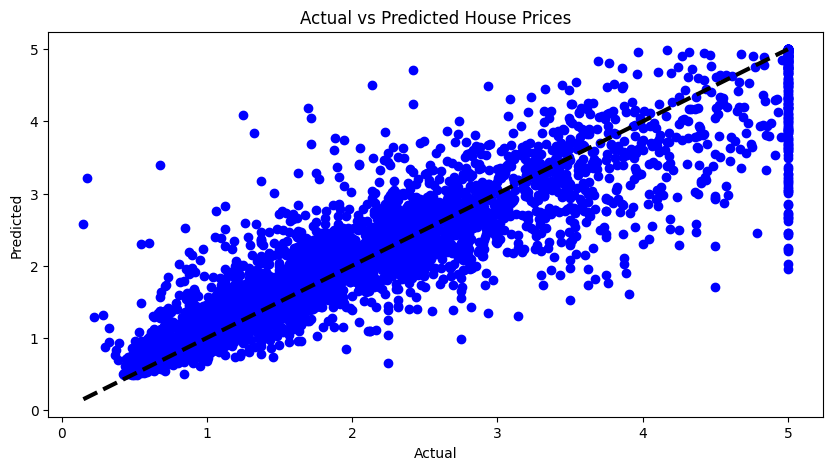

In [21]:
# Plot true vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()